## ***Exploratory Data Analysis (EDA)***

In [1]:
%pip install -U kaleido

## Importing all libraries for EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Basic Things about dataset

  Getting shape/size of the datset

In [5]:
print(df.shape)

(545, 13)


Getting names of columns present in dataset

In [6]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


Checking duplicate rows in datset

In [7]:
dupes = df.duplicated().sum()
print(f"Number of dupes in the dataset are : {dupes}")

Number of dupes in the dataset are : 0


Checking missing values in dataset

In [8]:
missing = df.isnull().sum()
print(f"Number of missing values in the dataset are : {missing.sum()}")

Number of missing values in the dataset are : 0


Getting Datatypes of all columns datatype

In [9]:
pd.DataFrame(df).dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


# Getting more basic description

Statistical description of dataset

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Summary of the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Types of furnishing status in dataset

In [12]:
furnish_types = list(df['furnishingstatus'].unique())
print(f"Types of furnishing statuses are : {*furnish_types,}")

Types of furnishing statuses are : ('furnished', 'semi-furnished', 'unfurnished')


Finding Houses with all appliances

In [13]:
appliances_all = df[(df['airconditioning']=='yes') & (df['hotwaterheating']=='yes')]
print(f'Number of houses with all appliances:  {len(appliances_all)}')
appliances_all.head()

Number of houses with all appliances:  1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
378,3640000,2275,3,1,3,yes,no,no,yes,yes,0,yes,semi-furnished


Finding Houses with no appliances

In [14]:
appliances_no = df[(df['airconditioning']=='no') & (df['hotwaterheating']=='no')]
print(f'Number of houses with no appliances:  {len(appliances_no)}')
appliances_no.head()

Number of houses with no appliances:  349


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished


# An KDE (Kernel Density Estimation) Plot for detecting outliners

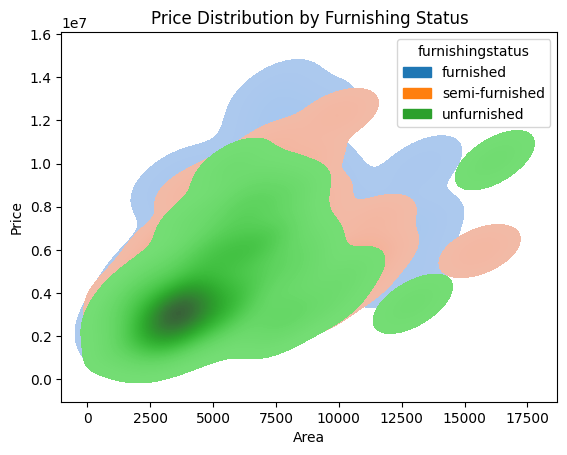

In [15]:
sns.kdeplot(x='area' , y='price', data=df, hue='furnishingstatus', fill=True, thresh=0.005, levels=100)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Distribution by Furnishing Status')
plt.show()

In [16]:
fig1 = px.density_contour(df, x='area', y='price', color='furnishingstatus', title='Price Distribution by Furnishing Status')
fig1.update_traces(contours_coloring="fill", contours_showlabels = True)
fig1.show()

/usr/local/lib/python3.11/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




# Plotting a boxplot to check outliners

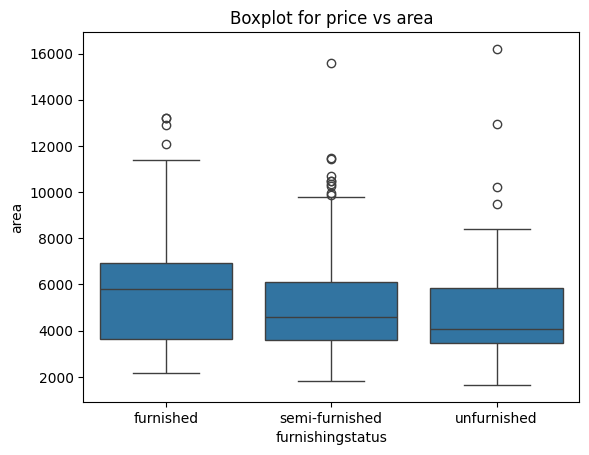

In [17]:
sns.boxplot(x='furnishingstatus', y='area', data=df)
plt.title('Boxplot for price vs area')
plt.show()

In [18]:
fig2 = px.box(df, x='furnishingstatus', y='area', title='Boxplot for price vs area', notched=True, points='all')
fig2.show()

# Introduction a new parameter: total_rooms

In [19]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

 Calculating Mean of :
*   Price per sq.feet
*   Price per number of rooms


In [20]:
df['price/sq.feet'] = df['price'] / df['area']
df['price/rooms'] = df['price'] / df['total_rooms']
print(f"Mean price per sq.feet : {df['price/sq.feet'].mean()}")
print(f"Mean price per number of rooms : {df['price/rooms'].mean()}")

Mean price per sq.feet : 993.3269783651732
Mean price per number of rooms : 1131735.6660550458


# Removing outliners based on various parameters using IQR (Inter Quantile Range) Method

In [21]:
outliners_data = [df['price'], df['area'], df['total_rooms'], df['price/sq.feet'], df['price/rooms']]
for i in  outliners_data:
  Q1 = i.quantile(0.25)
  Q3 = i.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound= Q3 + 1.5 * IQR
  df_no_out = df[(i >= lower_bound) & (i <= upper_bound)].copy()
df_no_out.index = range(1, len(df_no_out)+1)
df_no_out.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price/sq.feet,price/rooms
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8,1367.187500,1.531250e+06
2,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,6,1446.666667,1.808333e+06
3,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,7,1182.983683,1.450000e+06
4,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,8,626.543210,1.268750e+06
5,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,5,1218.518519,1.974000e+06


Calculating number of outliners

In [22]:
outliners = len(df) - len(df_no_out)
print(f"Number of outliners are : {outliners}")

Number of outliners are : 12


# Plot of Price per sq.feet with & without outliners



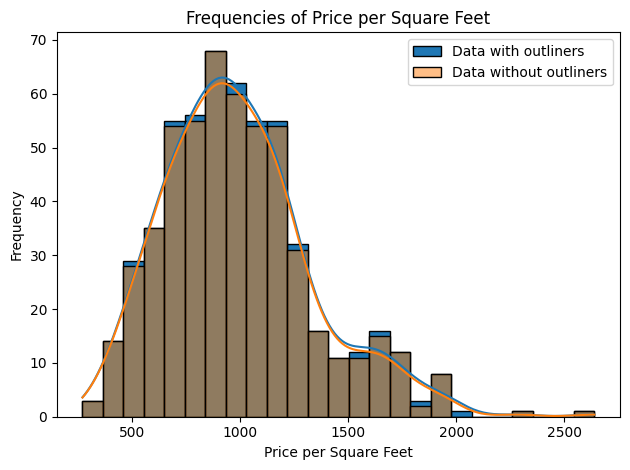

In [23]:
sns.histplot(df['price/sq.feet'] , kde=True, bins=25, label='Data with outliners', alpha=1)
sns.histplot(df_no_out['price/sq.feet'], kde=True, bins=25, label='Data without outliners', alpha = 0.5)
plt.title('Frequencies of Price per Square Feet')
plt.xlabel('Price per Square Feet')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# Predicting House prices using is area as only factor via regplot (Regression Plot)

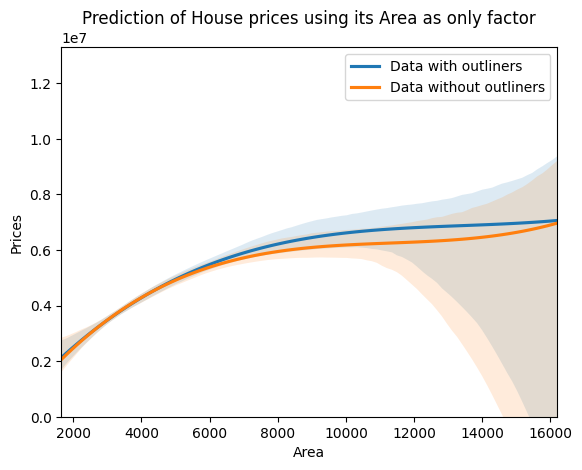

In [24]:
sns.regplot(x='area', y='price', data=df, scatter=False, order=3, label='Data with outliners')
sns.regplot(x='area', y='price', data=df_no_out, scatter=False, order=3, label='Data without outliners')

plt.xlabel('Area')
plt.ylabel('Prices')
plt.title('Prediction of House prices using its Area as only factor')
plt.xlim(df['area'].min(), df['area'].max())
plt.ylim(0, df['price'].max())
plt.legend()
plt.show()

# Predicting House prices using areas are for various furnishing status via lmplot (Linear Model Plot)

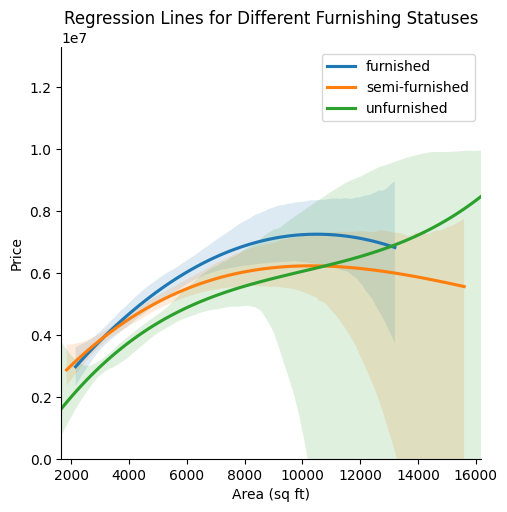

In [25]:
sns.lmplot(data=df, x='area', y='price', hue='furnishingstatus', height=5, scatter=False, order=3, legend=False)
plt.title("Regression Lines for Different Furnishing Statuses")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.xlim(df['area'].min(), df['area'].max())
plt.ylim(0, df['price'].max())
plt.legend(loc='best')
plt.show()

# Plot of Price per number of rooms with & without outliners

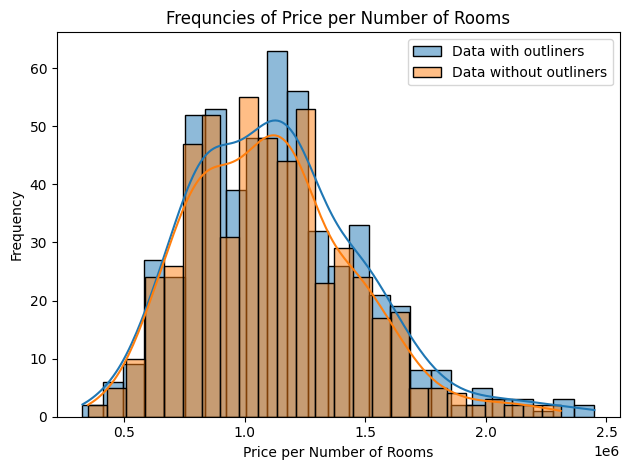

In [26]:
sns.histplot(df['price']/df['total_rooms'] , kde=True, bins=25, label='Data with outliners')
sns.histplot(df_no_out['price']/df['total_rooms'] , kde=True, bins=25, label='Data without outliners')
plt.title('Frequncies of Price per Number of Rooms')
plt.xlabel('Price per Number of Rooms')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Introdution a new parameter: has_parking

In [27]:
df_no_out['has_parking'] = 'no'
df_no_out.loc[df_no_out['parking'] > 0, 'has_parking'] = 'yes'

df_no_out.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price/sq.feet,price/rooms,has_parking
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8,1367.187500,1.531250e+06,yes
2,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,6,1446.666667,1.808333e+06,yes
3,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,7,1182.983683,1.450000e+06,yes
4,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,8,626.543210,1.268750e+06,no
5,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,5,1218.518519,1.974000e+06,yes


Going to convert 'str' dtypes to 'int'.

*   mainroad
*   guestroom
*   hotwaterheating
*   prefarea
*   airconditioning

Convention : 'yes' : 1, 'no' : 0, True : 1, False : 0






# Converting 'yes' & 'no' of the datset into '1' & '0' respectively

In [28]:
def convert_str_to_int (col) :
    df_no_out[col] = df_no_out[col].map({'yes':1, 'no':0, True:1, False:0})

for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'prefarea', 'airconditioning', 'has_parking'] :
  convert_str_to_int(col)
df_no_out.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price/sq.feet,price/rooms,has_parking
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,8,1367.187500,1.531250e+06,1
2,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,6,1446.666667,1.808333e+06,1
3,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,7,1182.983683,1.450000e+06,1
4,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,8,626.543210,1.268750e+06,0
5,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,5,1218.518519,1.974000e+06,1


# Introducing new parameters: log(prices) & log(area)
for skewed data if found/required

In [29]:
df_no_out['log_prices'] = np.log(df_no_out['price'])
df_no_out['log_area'] = np.log(df_no_out['area'])

# Introduction new parameter: luxury_score

In [30]:
df_no_out['luxury_score'] = 0.125*(df_no_out['price']/df_no_out['price'].max())
+ 0.175*(df_no_out['area']/df_no_out['area'].max())
+ 0.15*(df_no_out['total_rooms']/df_no_out['total_rooms'].max())
+ 0.07*(df_no_out['price/sq.feet']/df_no_out['price/sq.feet'].max())
+ 0.07*(df_no_out['price/rooms']/df_no_out['price/rooms'].max())
+ 0.05*(df_no_out['mainroad'])
+ 0.05*(df_no_out['guestroom'])
+ 0.05*(df_no_out['hotwaterheating'])
+ 0.05*(df_no_out['airconditioning'])
+ 0.06*(df_no_out['prefarea'])
+ 0.05*(df_no_out['basement'])
+ 0.05*(df_no_out['stories'])
+ 0.05*(df_no_out['has_parking'])
+ 0.05*(df_no_out['furnishingstatus'].map({'furnished':1, 'semi-furnished':0.5, 'unfurnished':0}))

df_no_out['luxury_score'] /= df_no_out['luxury_score'].max()
df_no_out.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms,price/sq.feet,price/rooms,has_parking,log_prices,log_area,luxury_score
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,8,1367.187500,1.531250e+06,1,16.321036,9.100526,1.000000
2,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,6,1446.666667,1.808333e+06,1,16.199676,8.922658,0.885714
3,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,7,1182.983683,1.450000e+06,1,16.132984,9.057189,0.828571
4,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,8,626.543210,1.268750e+06,0,16.132984,9.692767,0.828571
5,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,5,1218.518519,1.974000e+06,1,16.105010,8.999619,0.805714


# Introducing a new parameter: luxury_category

In [31]:
ranges = [0, 0.25, 0.5, 0.75, 1.1]
category = ['poor', 'average', 'good', 'excellent']
df_no_out['luxury_category'] = pd.cut(df_no_out['luxury_score'], bins=ranges, labels=category, right=False)

# Checking the amount of outliners still remained despite IQR method

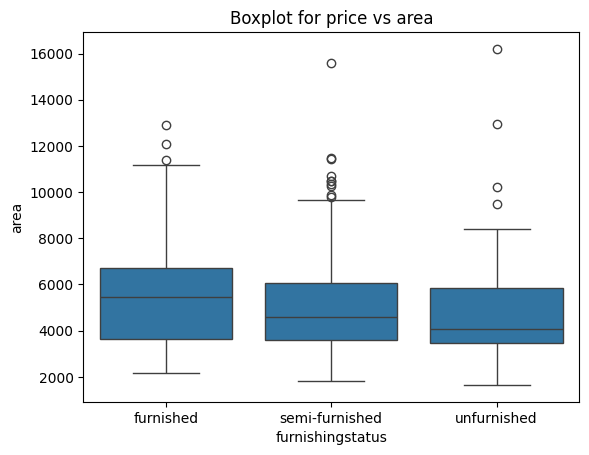

In [32]:
sns.boxplot(x='furnishingstatus', y='area', data=df_no_out)
plt.title('Boxplot for price vs area')
plt.show()

In [33]:
fig3 = px.box(df_no_out, x='furnishingstatus', y='area', title='Boxplot for price vs area', notched=True, points='all')
fig3.show()

# Plotting a KDE again to check effect after removing outliners

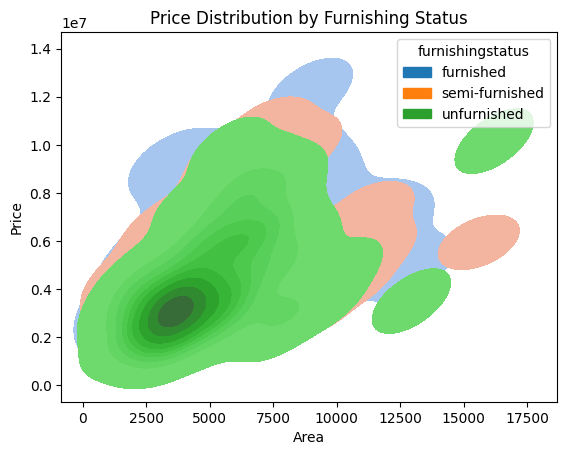

In [34]:
sns.kdeplot(x='area' , y='price', data=df_no_out, hue='furnishingstatus', fill=True, thresh=0.005)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price Distribution by Furnishing Status')
plt.show()

In [35]:
fig4 = px.density_contour(df_no_out, x='area', y='price', color='furnishingstatus', title='Price Distribution by Furnishing Status')
fig4.update_traces(contours_coloring="fill", contours_showlabels = True)
fig4.show()

It seems that both (boxplot, KDEplot) plots have not changed much as number of outliners removed are less (12) compared to original dataset (545), also it indicates that the data is not much skewed which might change the apperance of the graphs

# KDE Plot to show that outiners in this dataset were not much dominant

% error = 2.2018348623853212


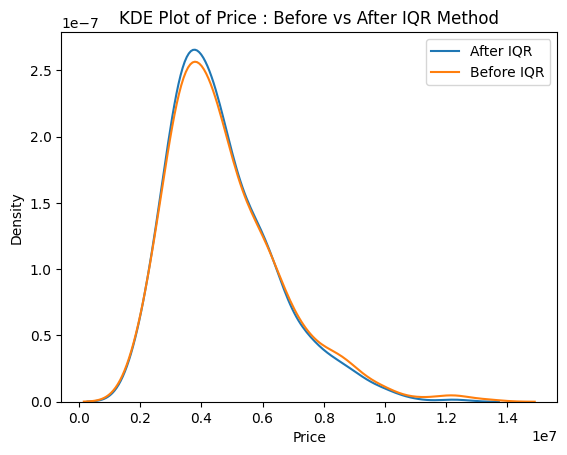

In [36]:
print(f"% error = {outliners / len(df) * 100}")
sns.kdeplot(x='price', data=df_no_out, label='After IQR')
sns.kdeplot(x='price', data=df, label='Before IQR')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('KDE Plot of Price : Before vs After IQR Method')
plt.legend()
plt.show()

# A simple barplot to compare air conditioning w.r.t furnishing status

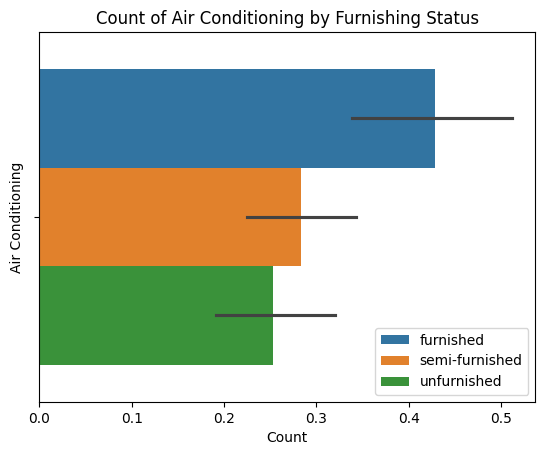

In [37]:
sns.barplot(x='airconditioning', data=df_no_out, hue='furnishingstatus')
plt.ylabel('Air Conditioning')
plt.xlabel('Count')
plt.title('Count of Air Conditioning by Furnishing Status')
plt.legend(loc='best')
plt.show()

# A Violin Plot to observe the distribution of data

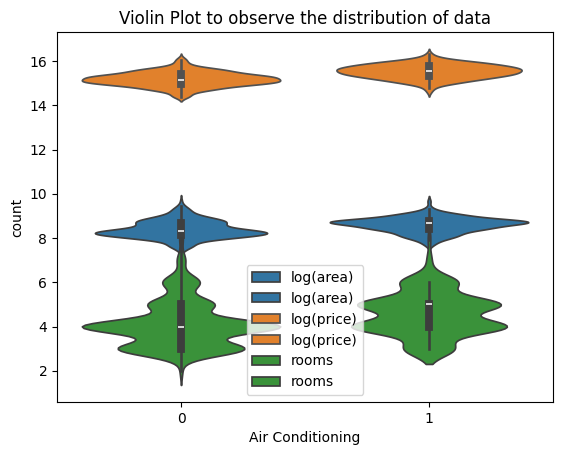

In [38]:
sns.violinplot(x='airconditioning', y='log_area', data=df_no_out, label='log(area)')
sns.violinplot(x='airconditioning', y='log_prices', data=df_no_out, label='log(price)')
sns.violinplot(x='airconditioning', y='total_rooms', data=df_no_out, label='rooms')
plt.xlabel('Air Conditioning')
plt.title('Violin Plot to observe the distribution of data')
plt.ylabel('count')
plt.legend(loc='best')
plt.show()

In [39]:
fig5 = px.violin(df_no_out, x='airconditioning', y='log_area', title='Violin Plot to observe the distribution of data', box=True, points='all', color='furnishingstatus')
fig5.show()

# Scatter Plot of observe luxury score w.r.t area of House

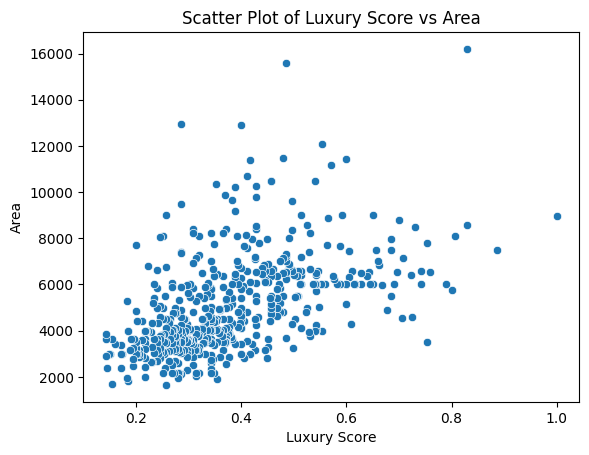

In [40]:
sns.scatterplot(x='luxury_score', y='area', data=df_no_out)
plt.xlabel('Luxury Score')
plt.ylabel('Area')
plt.title('Scatter Plot of Luxury Score vs Area')
plt.show()

In [41]:
fig6 = px.scatter(df_no_out, x='luxury_score', y='area', title='Scatter Plot of Luxury Score vs Area', color='furnishingstatus', marginal_x='histogram', marginal_y='histogram')
fig6.show()

# Plotting a Histogram to compare the frequencies of categories in luxury

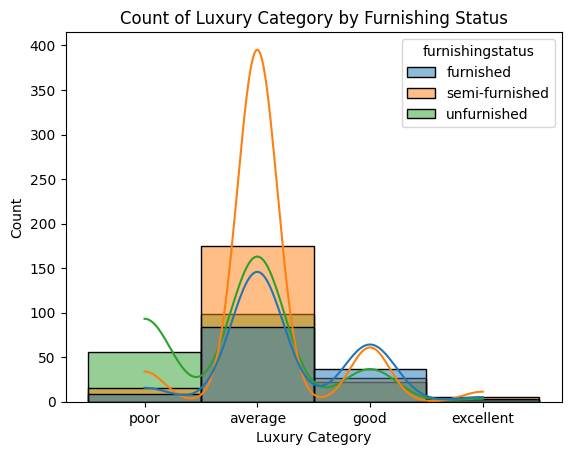

In [42]:
sns.histplot(x='luxury_category', data=df_no_out, hue='furnishingstatus', kde=True)
plt.xlabel('Luxury Category')
plt.ylabel('Count')
plt.title('Count of Luxury Category by Furnishing Status')
plt.show()

# Scatter PLot of Luxury Score vs Luxury Category w.r.t Furnishing Status

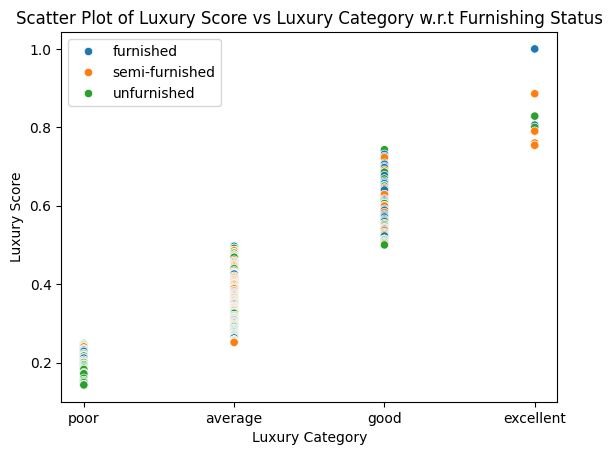

In [43]:
sns.scatterplot(y='luxury_score', x='luxury_category', data=df_no_out, hue='furnishingstatus')
plt.ylabel('Luxury Score')
plt.xlabel('Luxury Category')
plt.title('Scatter Plot of Luxury Score vs Luxury Category w.r.t Furnishing Status')
plt.legend(loc='best')
plt.show()

# Correlation Matrix

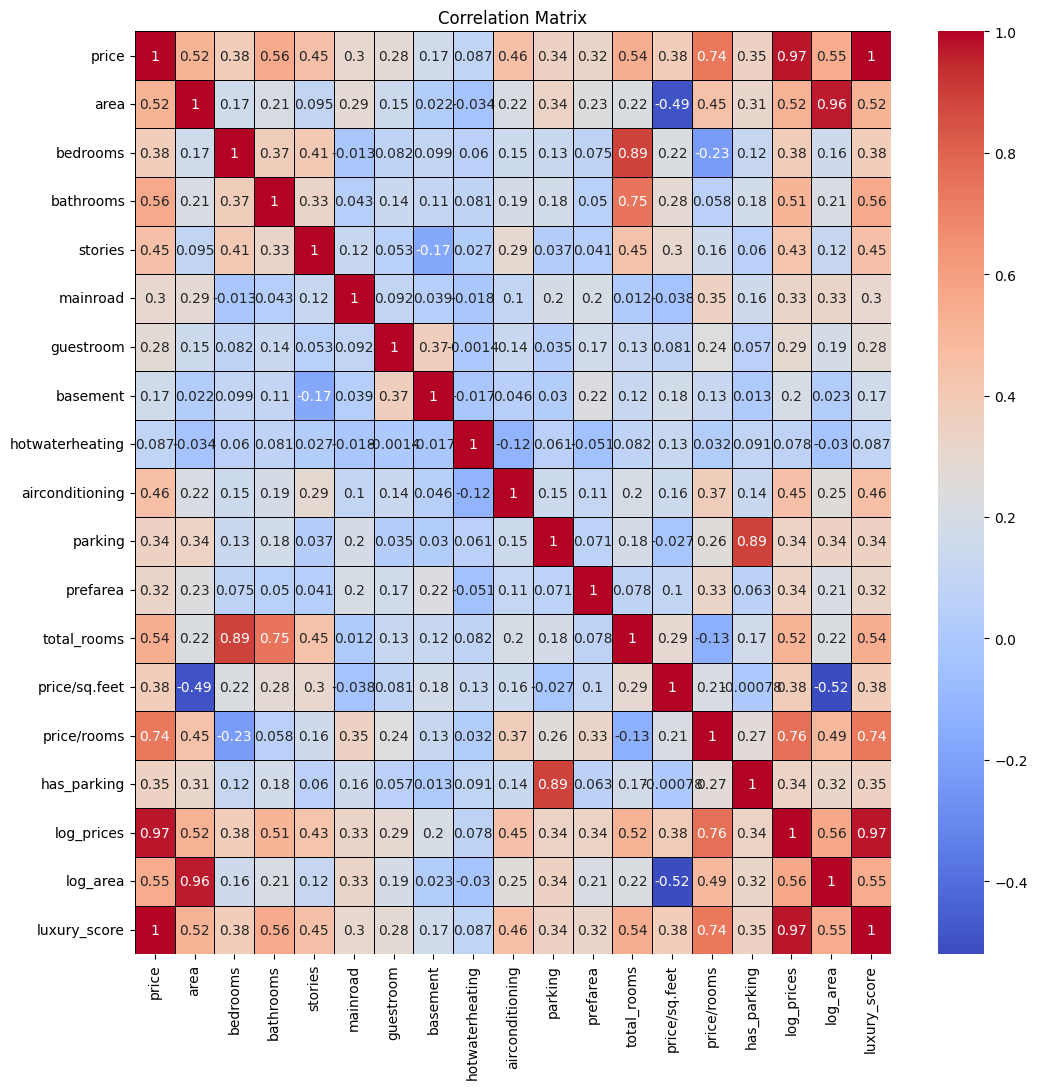

In [44]:
plt.figure(figsize=(11,11))
sns.heatmap(df_no_out.corr(numeric_only=True), cmap='coolwarm', linewidths=0.5, linecolor='black', annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Plotting a Pairplot to get relations between parameters

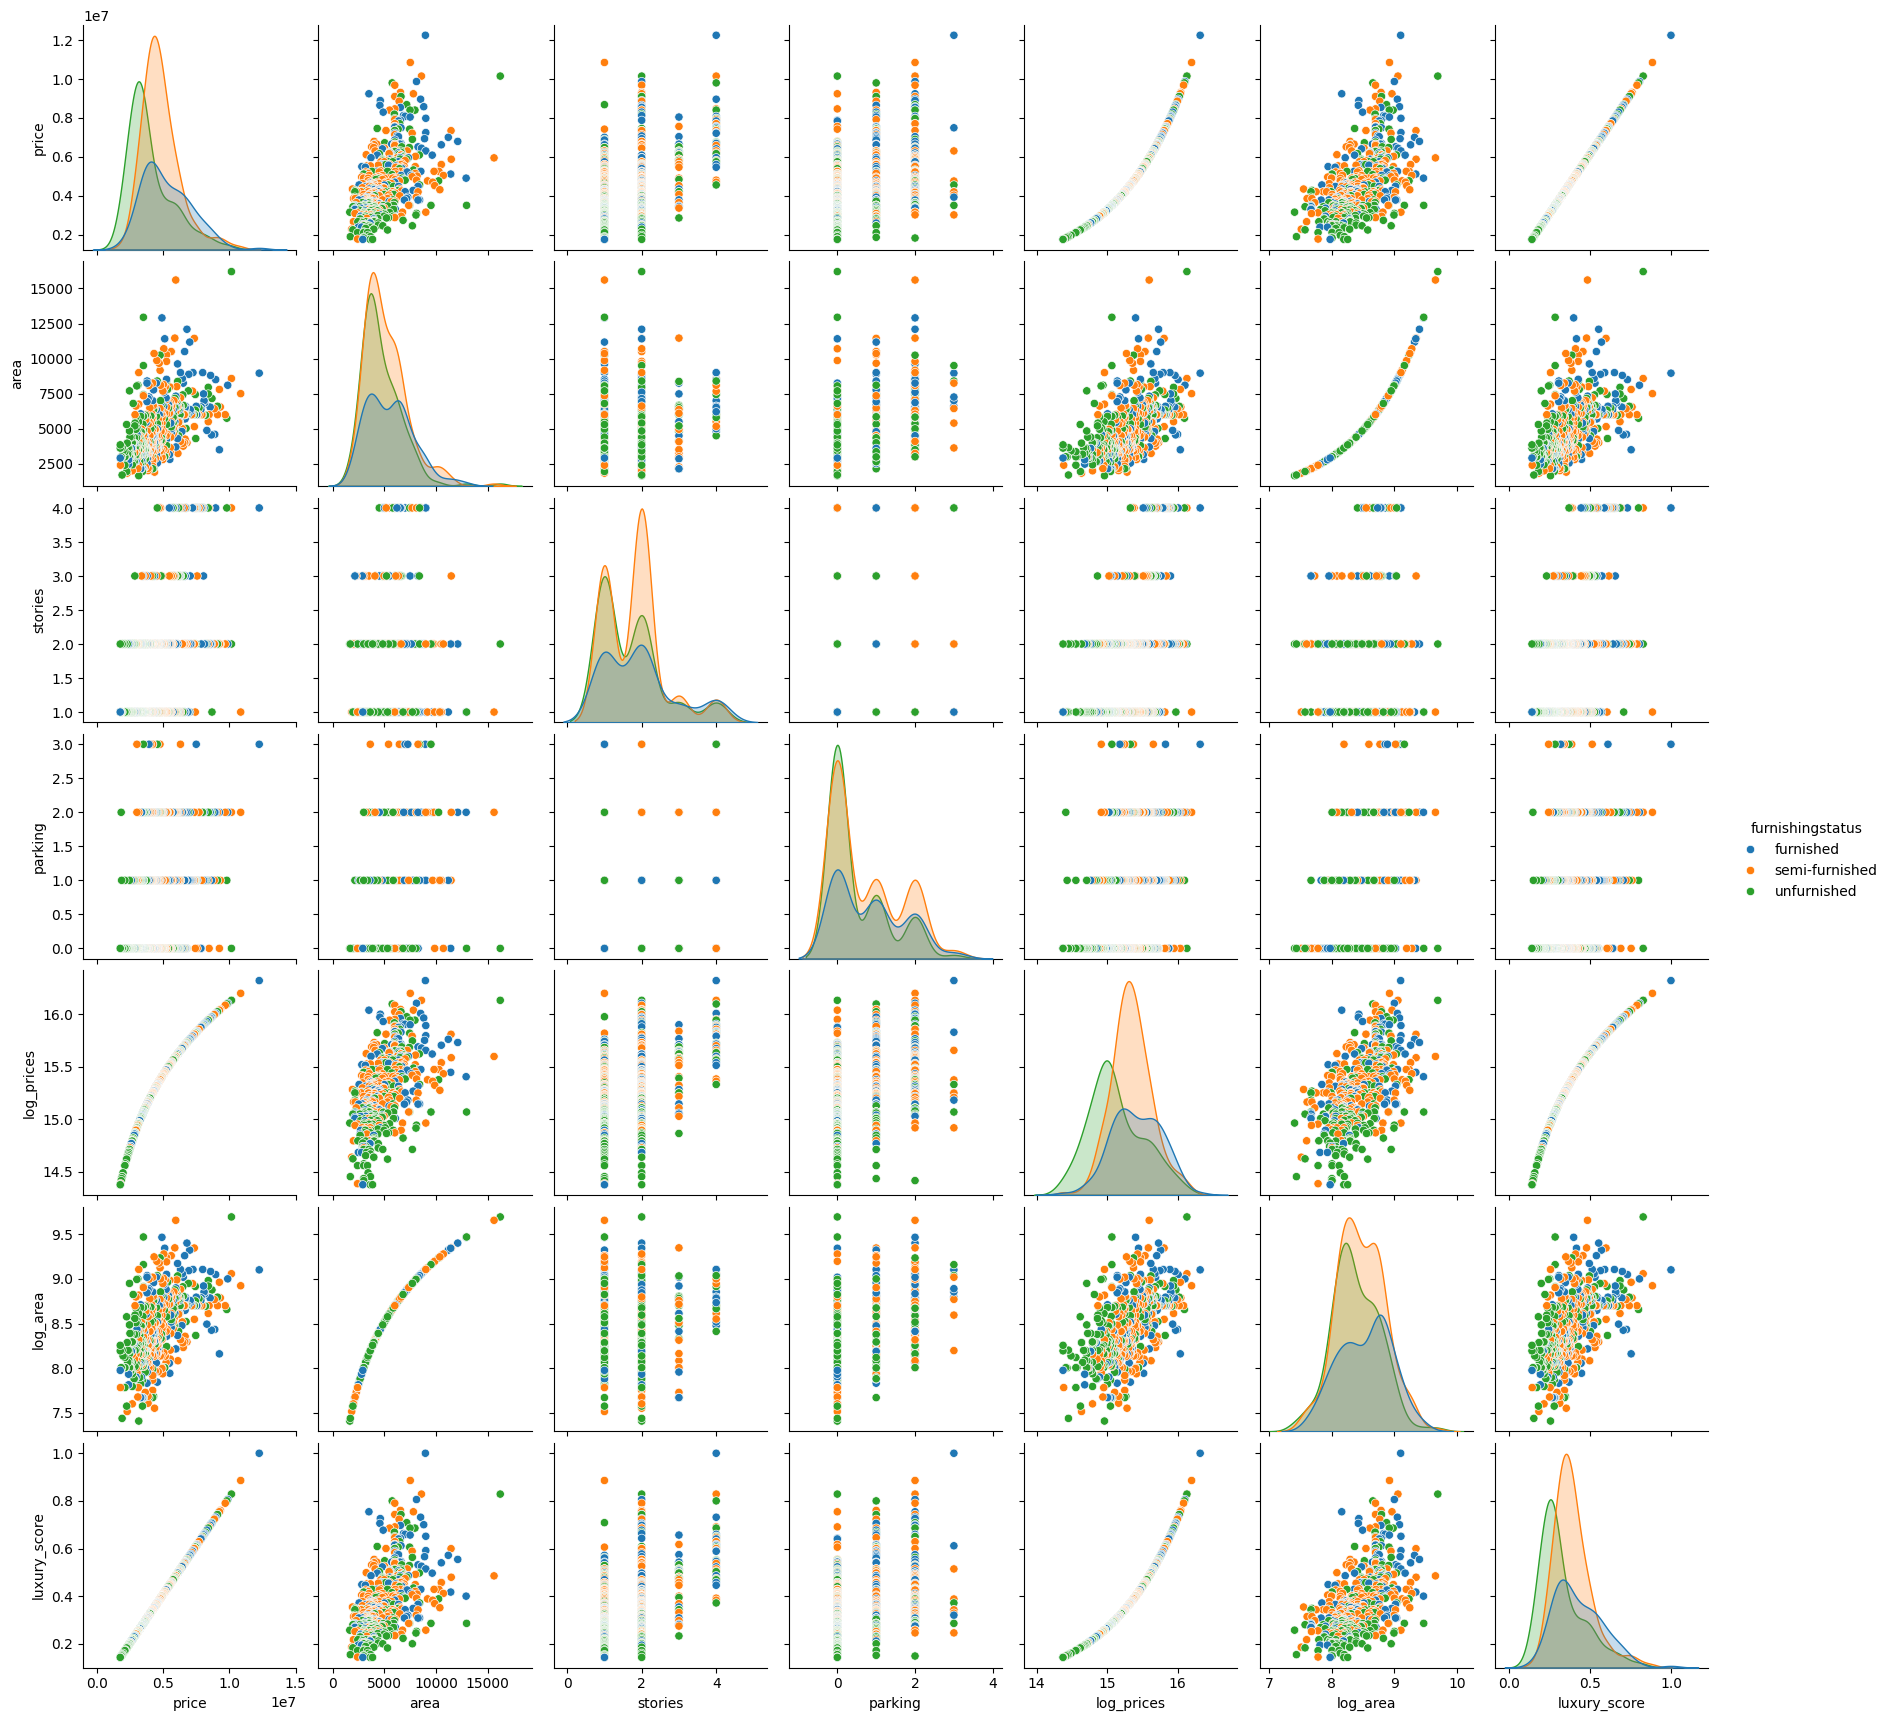

In [45]:
sns.pairplot(df_no_out, vars=['price', 'area', 'stories', 'parking', 'log_prices', 'log_area', 'luxury_score'], hue='furnishingstatus')
plt.show()

# ***Machine Learning Algorithms & code***

## Importing all libraries for making preditive model

In [46]:
from sklearn.model_selection import train_test_split                            # splits dataset according to test_size
from sklearn.preprocessing import PolynomialFeatures                            # forms model with degree mentioned by us
from sklearn.linear_model import LinearRegression                               # gets a linear regression model
from sklearn.linear_model import ElasticNet                                     # does both lasso & ridge
from sklearn.metrics import r2_score                                            # calculates R squared
from sklearn.model_selection import cross_val_score, RepeatedKFold# calculated cross-validation score # does n_splits on dataset which are to be repeated m times another way of using KFold for smartly without doing too many folds

Listing features used in prediction in DataFrame

In [47]:
df1 = df_no_out.copy()
X = df1[['log_area', 'total_rooms', 'stories', 'has_parking', 'mainroad']]
y = df1['log_prices']

Feature Transforming & splitting dataset for testing

In [48]:
poly = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly.fit_transform(X)
ElasticNet(alpha=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Calculating R² for predition model

In [49]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.5669014759766092


Carrying out Repeated K Fold to get average R², ensuring that its a stable model and not "lucky" or "unlucky" due to random_state selected earlier

In [50]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)
scores = cross_val_score(model, X, y, cv=RepeatedKFold(n_splits=10, n_repeats=10), scoring='r2')

print("Average R²:", np.mean(scores))

Average R²: 0.5358231481477621


## Getting Exact Model Expression

In [51]:
feature_names = [f"x{i}" for i in range(X.shape[1])]
poly_feature_names = poly.get_feature_names_out(X.columns)

coefs = model.coef_
intercept = model.intercept_

terms = [f"{intercept:.4f}"]
for coef, name in zip(coefs, poly_feature_names):
    if name == "1":
        continue
    terms.append(f"{coef:.4f}*{name}")

expression = " + ".join(terms)
print("Model Expression:\n", expression)

Model Expression:
 11.4929 + 0.3587*log_area + 0.1020*total_rooms + 0.0940*stories + 0.0685*has_parking + 0.1474*mainroad


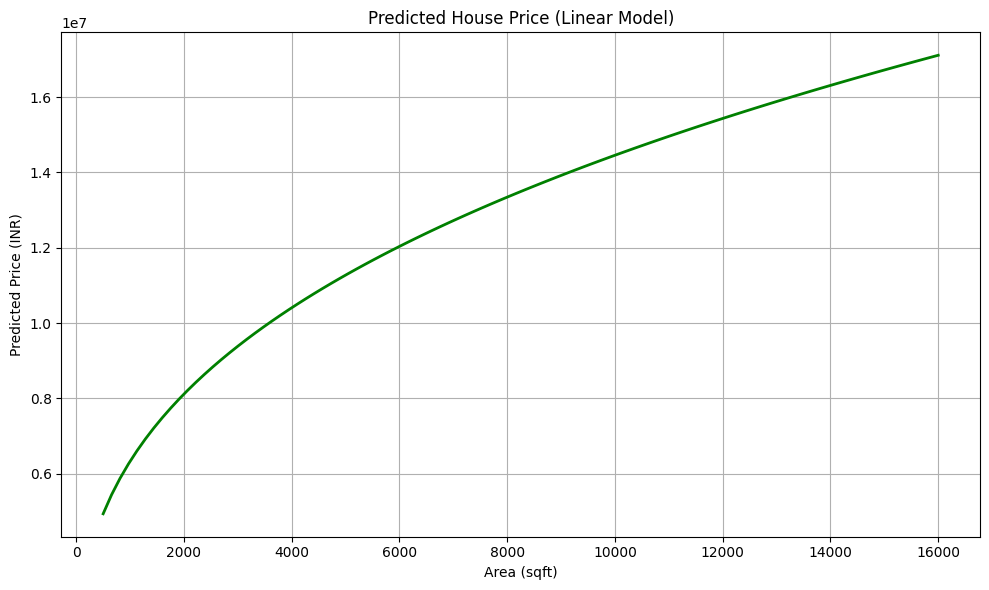

In [52]:
area_values = np.linspace(500, 16000, 100)
log_area = np.log(area_values)

total_rooms = 8
stories = 7
has_parking = 1
mainroad = 1

log_price = (
    11.4929
    + 0.3587 * log_area
    + 0.1020 * total_rooms
    + 0.0940 * stories
    + 0.0685 * has_parking
    + 0.1474 * mainroad
)

price = np.exp(log_price)

plt.figure(figsize=(10, 6))
plt.plot(area_values, price, color='green', linewidth=2)
plt.title("Predicted House Price (Linear Model)")
plt.xlabel("Area (sqft)")
plt.ylabel("Predicted Price (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()